# QCoDeS Example with HP8594E

In this notebook we will go through the driver for HP8594E

In [1]:
from  qcodes_contrib_drivers.drivers.HP.HP8594E import HP8594E
from qcodes.utils.dataset import doNd
import time

NoTagError: `git describe` could not find a tag


In [2]:
hp = HP8594E('test', 'GPIB1::6::INSTR')

You can get the trace by getting the trace paramter.
Getting the trace paramter sets the spectrum analyzer to single sweep mode and performe a sweep and transfers the data to the computer. 

Starting experimental run with id: 404. Using 'qcodes.dataset.do0d'


(results #404@C:\Users\Farzad\experiments.db
 -------------------------------------------
 test_freq_axis - array
 test_trace - array,
 [<AxesSubplot:title={'center':'Run #404, Experiment tutorial_exp (no sample)'}, xlabel='freq_axis (GHz)', ylabel='trace (dBm)'>],
 [None])

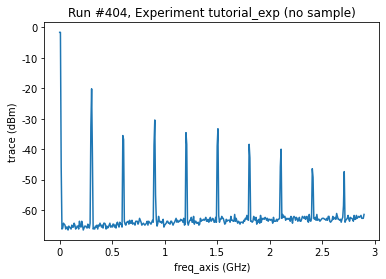

In [3]:

doNd.do0d(hp.trace, do_plot=True)


### Start, Stop, Center and Span
We can  set and get the start-, stop-, center-frequency and span. However, it is important  to note that setting start or stop, also changes center and span, and setting center or span  changes start and stop 


In [4]:

print(f"start frequency {hp.start_freq()}\n"
      f"stop frequency {hp.stop_freq()}\n"
      f"center frequency {hp.center_freq()}\n"
      f"span {hp.span()}")
hp.start_freq(2450000000.0)
print(f"start frequency {hp.start_freq()}\n"
      f"stop frequency {hp.stop_freq()}\n"
      f"center frequency {hp.center_freq()}\n"
      f"span {hp.span()}")


start frequency 0.0
stop frequency 2900000000.0
center frequency 1450000000.0
span 2900000000.0
start frequency 2450000000.0
stop frequency 2900000000.0
center frequency 2675000000.0
span 450000000.0


Starting experimental run with id: 405. Using 'qcodes.dataset.do1d'


c:\Users\Farzad\miniconda3\envs\qcodesfork\lib\site-packages\qcodes\dataset\plotting.py:680: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  colormesh = ax.pcolormesh(


(results #405@C:\Users\Farzad\experiments.db
 -------------------------------------------
 test_start_freq - numeric
 test_freq_axis - array
 test_trace - array,
 [<AxesSubplot:title={'center':'Run #405, Experiment tutorial_exp (no sample)'}, xlabel='Sweep start frequency (GHz)', ylabel='freq_axis (GHz)'>],
 [<matplotlib.colorbar.Colorbar at 0x215b23ea6a0>])

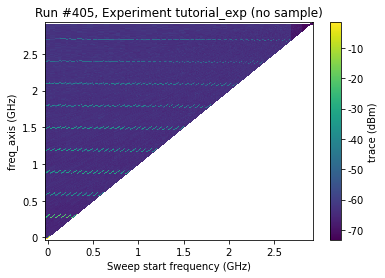

In [5]:
doNd.do1d(hp.start_freq, 90000, 2900000000, 50, 0.01, hp.trace, do_plot=True)

### More settings 
we can also set the sweep time, resolution and video bandwith, attenuation and reference level.

In [6]:
print(f"sweep time {hp.sweep_time()}\n"
f"resolution bandwidth {hp.resolution_bandwidth()}\n"
f"video bandwidth {hp.video_bandwidth()}\n"
f"attenuation {hp.attenuation()}\n"
f"reference level {hp.reference_level()}"
)

sweep time 0.02
resolution bandwidth 300000.0
video bandwidth 100000.0
attenuation 10.0
reference level 0.0


Starting experimental run with id: 406. Using 'qcodes.dataset.do0d'


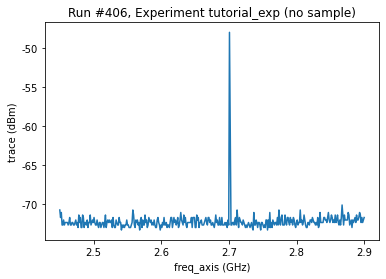

In [7]:
hp.start_freq(2450000000.0)
hp.resolution_bandwidth(3000000.0/10)
doNd.do0d(hp.trace, do_plot=True)
hp.resolution_bandwidth(3000000)

Starting experimental run with id: 407. Using 'qcodes.dataset.do0d'


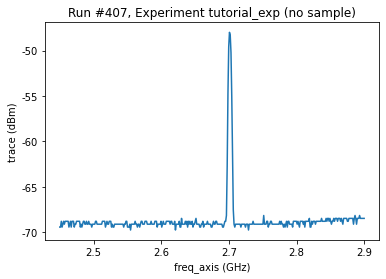

In [8]:
hp.video_bandwidth(1000000.0/100)
doNd.do0d(hp.trace, do_plot=True)
hp.video_bandwidth(1000000.0)

Starting experimental run with id: 408. Using 'qcodes.dataset.do0d'
Starting experimental run with id: 409. Using 'qcodes.dataset.do0d'


(results #409@C:\Users\Farzad\experiments.db
 -------------------------------------------
 test_freq_axis - array
 test_trace - array,
 [<AxesSubplot:title={'center':'Run #409, Experiment tutorial_exp (no sample)'}, xlabel='freq_axis (GHz)', ylabel='trace (dBm)'>],
 [None])

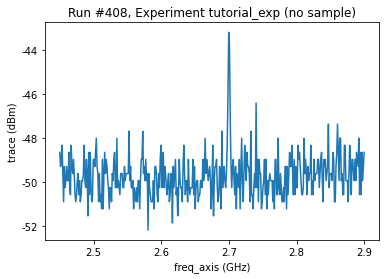

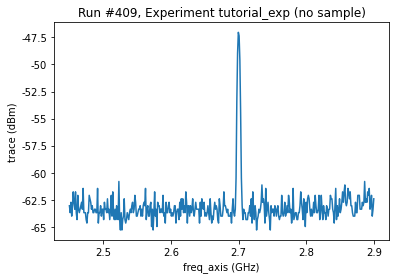

In [9]:
hp.attenuation(30)
doNd.do0d(hp.trace, do_plot=True)
hp.attenuation(10)
doNd.do0d(hp.trace, do_plot=True)

Starting experimental run with id: 410. Using 'qcodes.dataset.do0d'
Starting experimental run with id: 411. Using 'qcodes.dataset.do0d'


(results #411@C:\Users\Farzad\experiments.db
 -------------------------------------------
 test_freq_axis - array
 test_trace - array,
 [<AxesSubplot:title={'center':'Run #411, Experiment tutorial_exp (no sample)'}, xlabel='freq_axis (GHz)', ylabel='trace (dBm)'>],
 [None])

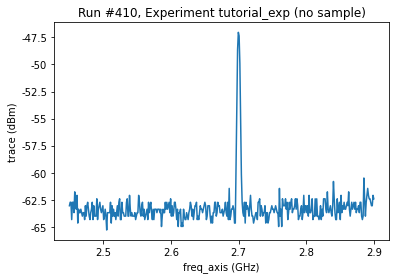

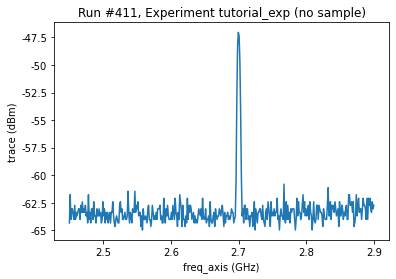

In [10]:
hp.reference_level(30)
doNd.do0d(hp.trace, do_plot=True)
hp.reference_level(0)
doNd.do0d(hp.trace, do_plot=True)

### Transfer type
Finally (if you need to kill som time) you can change the transfer type of the trace to ASCII

In [11]:
nn = 10
hp.trace.transfer_type = 'ASCII'
start = time.perf_counter()
for i in range(nn):
    hp.trace()
ASCII_time =  (time.perf_counter()-start)/nn

hp.trace.transfer_type = 'bytes'
start = time.perf_counter()
for i in range(nn):
    hp.trace()
bytes_time =  (time.perf_counter()-start)/nn
print(f"ASCII_time {ASCII_time}\n"
      f"bytes_time {bytes_time }")

ASCII_time 0.7234789200000001
bytes_time 0.17353685


In [12]:
hp.get_info()

{'model': 'HP8594E',
 'firmware_date': '950914\r',
 'serial_number': '3199\r',
 'uptime': datetime.timedelta(days=4, seconds=19155, microseconds=772000)}

In [13]:
hp.reset()